# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


In [4]:
url = f'https://api.openweathermap.org/data/2.5/weather?q={cities[0]}&appid={weather_api_key}'
response = requests.get(url)
# pprint(response.json())
# cities

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
# url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | broome
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | cockburn town
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | khor
Processing Record 7 of Set 1 | braslav
City not found. Skipping...
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | bowen
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | corinto
Processing Record 12 of Set 1 | hihifo
City not found. Skipping...
Processing Record 13 of Set 1 | durango
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | dingle
Processing Record 17 of Set 1 | vila velha
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | jumla
Processing Record 21

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,broome,42.2506,-75.8330,293.96,81,100,5.81,US,1667743739
1,lata,40.1629,-8.3327,292.08,84,100,0.53,PT,1667743752
2,cockburn town,21.4612,-71.1419,299.28,75,100,6.29,TC,1667743753
3,hithadhoo,-0.6000,73.0833,300.46,75,100,3.00,MV,1667743753
4,khor,47.8861,134.9464,269.41,73,9,2.57,RU,1667743754


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_personal.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_personal.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,broome,42.2506,-75.8330,293.96,81,100,5.81,US,1667743739
1,lata,40.1629,-8.3327,292.08,84,100,0.53,PT,1667743752
2,cockburn town,21.4612,-71.1419,299.28,75,100,6.29,TC,1667743753
3,hithadhoo,-0.6000,73.0833,300.46,75,100,3.00,MV,1667743753
4,khor,47.8861,134.9464,269.41,73,9,2.57,RU,1667743754


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

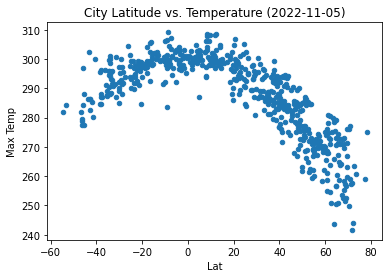

In [22]:
x = 'Lat'
y = 'Max Temp'

# # Build scatter plot for latitude vs. temperature
city_data_df.plot(x, y, kind = 'scatter')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-11-05)")
plt.xlabel(city_data_df['Lat'].name)
plt.ylabel(city_data_df['Max Temp'].name)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

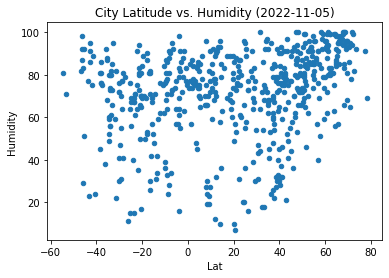

In [23]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x='Lat', y='Humidity', kind='scatter')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-11-05)")
plt.xlabel(city_data_df['Lat'].name)
plt.ylabel(city_data_df['Humidity'].name)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

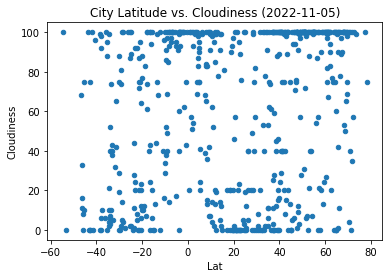

In [24]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x='Lat', y='Cloudiness', kind='scatter')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-11-05)")
plt.xlabel(city_data_df['Lat'].name)
plt.ylabel(city_data_df['Cloudiness'].name)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

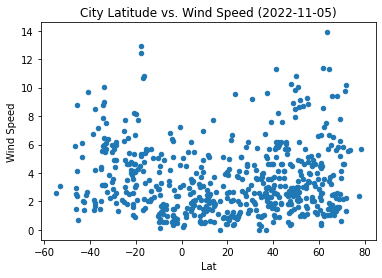

In [25]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x='Lat', y='Wind Speed', kind='scatter')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-11-05)")
plt.xlabel(city_data_df['Lat'].name)
plt.ylabel(city_data_df['Wind Speed'].name)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots
def reg_plot(xseries, yseries):
    xseries = xseries
    yseries = yseries
    slope, intercept, rvalue, pvalue, stderr = linregress(xseries, yseries)
    lat_range = range(int(round(xseries.values.min(),0)), int(round(xseries.values.max(), 0)))
    ax = plt.subplot()
    ax = plt.scatter(xseries, yseries)
    ax = plt.plot(lat_range, slope * lat_range + intercept, color='r')
    ax = plt.annotate(f'y = {round(slope,2)} * x + {round(intercept,2)}', \
        (xseries.values.min(), yseries.values.min()+10), \
            fontsize=10, color="red")
    ax = plt.title(f'{xseries.name} vs. {yseries.name} (2022-11-05)')
    # print(f'lat range from {xseries.values.min()} to {xseries.values.max()}.')
    return ax


In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,broome,42.2506,-75.8330,293.96,81,100,5.81,US,1667743739
1,lata,40.1629,-8.3327,292.08,84,100,0.53,PT,1667743752
2,cockburn town,21.4612,-71.1419,299.28,75,100,6.29,TC,1667743753
4,khor,47.8861,134.9464,269.41,73,9,2.57,RU,1667743754
7,butaritari,3.0707,172.7902,299.26,75,100,2.98,KI,1667743756


In [126]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hithadhoo,-0.6000,73.0833,300.46,75,100,3.00,MV,1667743753
5,vaini,-21.2000,-175.2000,296.24,83,20,2.57,TO,1667743755
6,bowen,-20.0167,148.2333,297.87,70,77,8.16,AU,1667743755
10,new norfolk,-42.7826,147.0587,286.32,95,0,1.42,AU,1667743757
11,punta arenas,-53.1500,-70.9167,284.21,71,0,3.09,CL,1667743758


###  Temperature vs. Latitude Linear Regression Plot

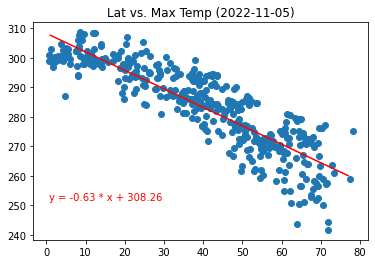

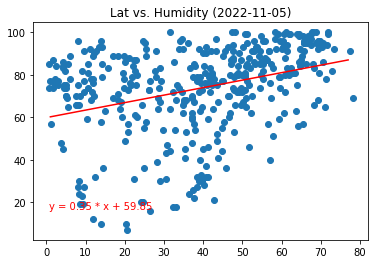

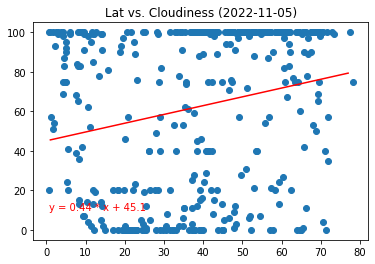

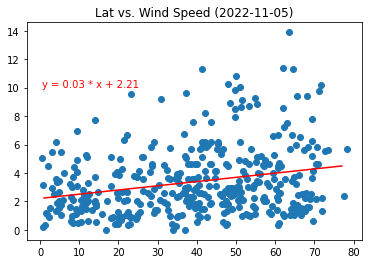

In [127]:
# Linear regression on Northern Hemisphere
ax_maxtemp = reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.show()

ax_humidity = reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.show()

ax_cloudiness = reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.show()

ax_wind = reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.show()

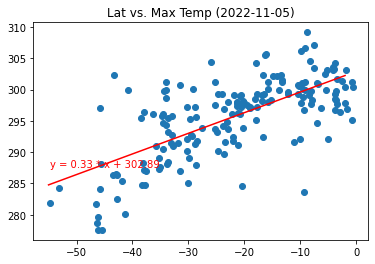

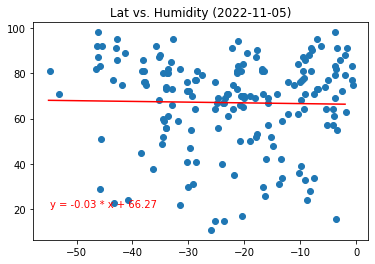

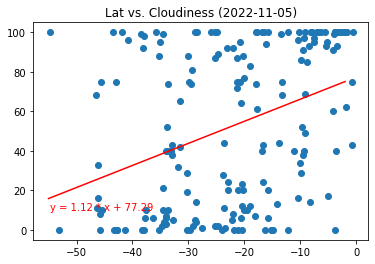

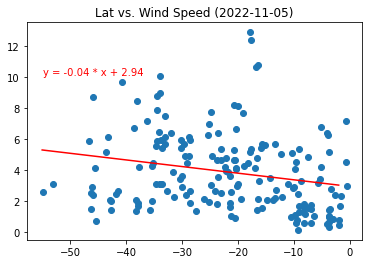

In [128]:
# Linear regression on Southern Hemisphere
ax_maxtemp = reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.show()

ax_humidity = reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.show()

ax_cloudiness = reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.show()

ax_wind = reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.show()

**Discussion about the linear relationship:** The correlations of all parameters vs Latitude for south and north are reversed due to the inverse relationship latitude has with proximity to the equator. Proximity to the equator seems to be the real correlation, not scalar latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


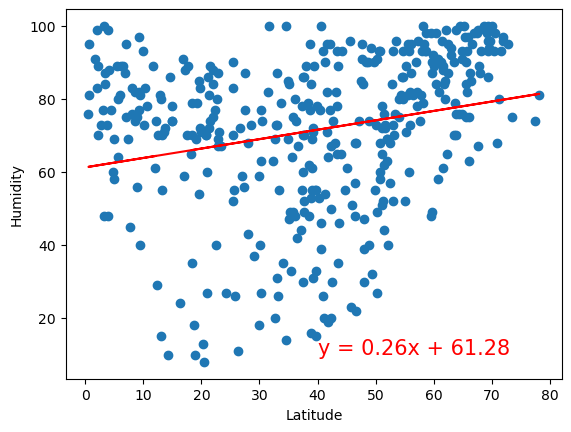

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


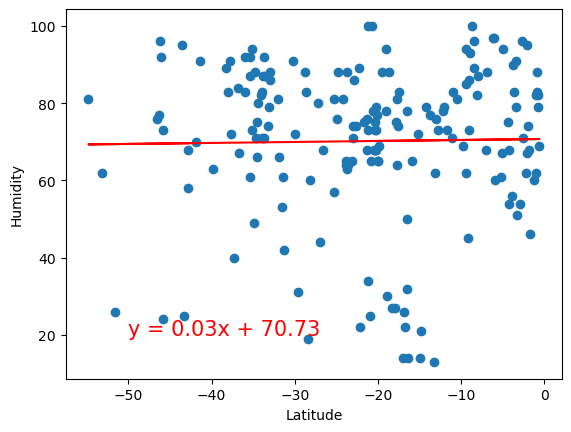

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


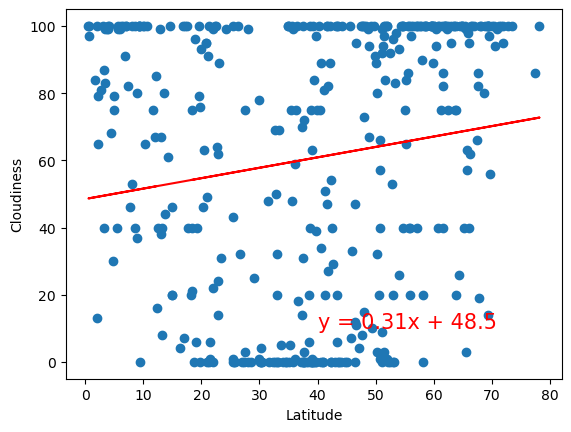

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


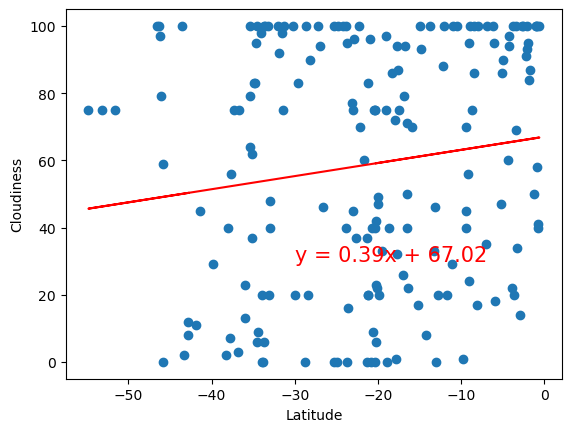

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


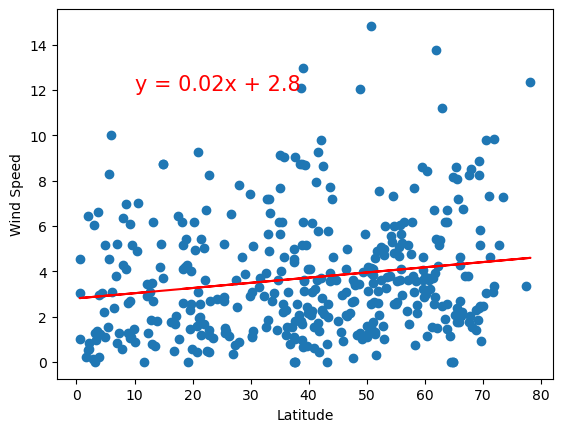

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


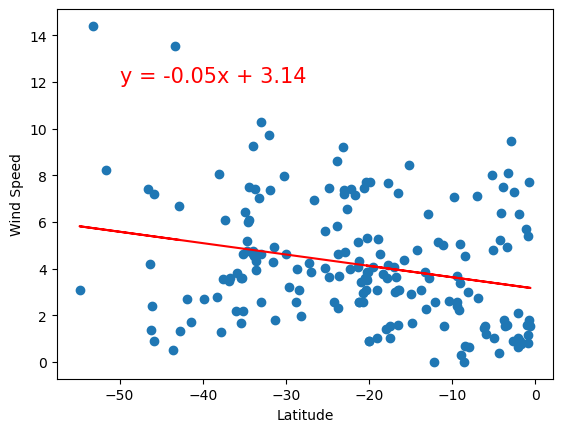

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE